In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapezoid, simpson, romberg, quad

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: David Alejandro Pérez
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

### **Para la integral:**
---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----

In [ ]:
# trapeziode
f_1 = lambda x: 1/((np.tan(x))**(1/2))


n = 2
tol = 1e-5
a = 1e-5
for i in range(1, 1000000):

  n_2 = n*2
  x_1 = np.linspace(a, np.pi/2, n)
  x_2 = np.linspace(a, np.pi/2, n_2)

  y_1 = f_1(x_1)
  y_2 = f_1(x_2)

  I_1 = trapezoid(y_1, x_1)
  I_2 = trapezoid(y_2, x_2)


  if abs(I_1 - I_2) < tol:
    print(f"El valor de la integral es {I_2}, se necesitaron {n} sub-intervalos para que el error relativo fuera menor a {tol}")  # valor de la integral por el metodo trapezoidal
    break

  else:
    n = n_2



El valor de la integral es 2.215119866078745, se necesitaron 524288 sub-intervalos para que el error relativo fuera menor a 1e-05


In [ ]:
# metodo simpson 1/3
for i in range(1, 100000):

  n_2 = n*2
  x_1 = np.linspace(a, np.pi/2, n)
  x_2 = np.linspace(a, np.pi/2, n_2)

  y_1 = f_1(x_1)
  y_2 = f_1(x_2)

  I_1 = simpson(y_1, x_1)
  I_2 = simpson(y_2, x_2)


  if abs(I_1 - I_2) < tol:
    print(f"El valor de la integral es {I_2}, se necesitaron {n} sub-intervalos para que el error relativo fuera menor a {tol}")  # valor de la integral por el metodo simpson
    break

  else:
    n = n_2

El valor de la integral es 2.2151169294824236, se necesitaron 524288 sub-intervalos para que el error relativo fuera menor a 1e-05


In [ ]:
# por el metodo de cuadratura

I, err = quad(f_1, 0, np.pi/2, epsabs= tol)
print(f"El valor estimado por cuadratura con un error menor a {tol} por el metodo de cuadratura es {I}")

El valor estimado por cuadratura con un error menor a 1e-05 por el metodo de cuadratura es 2.221441469079092


### **Para la integral:**
----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----


In [ ]:
f_2 = lambda x: np.cos(x)/(x**3)

n = 9
e = 1e-5
for i in range(1, 1000000):

  n_2 = n*2
  x_1 = np.linspace(1, 1e4, n)
  x_2 = np.linspace(1, 1e4, n_2)

  y_1 = f_2(x_1)
  y_2 = f_2(x_2)

  I_1 = trapezoid(y_1, x_1)
  I_2 = trapezoid(y_2, x_2)


  if abs(I_1 - I_2) < e:
    print(f"El valor de la integral es {I_2}, se necesitaron {n} sub-intervalos para que el error relativo fuera menor a {e}")  # valor de la integral por el metodo trapezoidal
    break

  else:
    n = n_2


El valor de la integral es 0.01811854340780818, se necesitaron 2359296 sub-intervalos para que el error relativo fuera menor a 1e-05


In [ ]:
# metodo simpson 1/3


for i in range(1, 100000):

  n_2 = n*2
  x_1 = np.linspace(1, 1e3, n)
  x_2 = np.linspace(1, 1e3, n_2)

  y_1 = f_2(x_1)
  y_2 = f_2(x_2)

  I_1 = simpson(y_1, x_1)
  I_2 = simpson(y_2, x_2)


  if abs(I_1 - I_2) < e:
    print(f"El valor de la integral es {I_2}, se necesitaron {n} sub-intervalos para que el error relativo fuera menor a {e}")  # valor de la integral por el metodo simpson
    break

  else:
    n = n_2

# aprece el deprecation warning pero el resultado de la integral esta al inicio profe

El valor de la integral es 0.0181176228057888, se necesitaron 2359296 sub-intervalos para que el error relativo fuera menor a 1e-05


In [ ]:
# por el metodo de cuadratura

I = quad(f_2, 1, np.inf, epsabs = 1e-5)[0]
print(f"El valor estimado de la integral por el metodo de cuadratura con un error menor a {e} por el metodo de cuadratura es {I}")

El valor estimado de la integral por el metodo de cuadratura con un error menor a 1e-05 por el metodo de cuadratura es 0.018117412348155622


### **Para la integral:**
----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dydx}
 $$

---


In [ ]:
# Trapezoidal #

# datos #
f_3 = lambda x,y: 1/(1 - y**2)**(1/2)

a, b = 0, np.pi/4
c, d = lambda x: 0, lambda x: np.sin(x)

# funcion para calcular una integral doble con el metodo trapezoid de simpy
def trape_doble(f, a, b, c, d, n):

  x_lin = np.linspace(a, b, n)
  c_lin = []
  d_lin = []
  for i in range(n):
    c_lin.append(c(x_lin[i]))
    d_lin.append(d(x_lin[i]))

  I_1 = []
  for i in range(n):
    y_lin = np.linspace(c_lin[i], d_lin[i], n)
    fi = lambda y: f_3(x_lin[i], y)
    I_1.append(trapezoid(fi(y_lin), y_lin))

  I = trapezoid(I_1, x_lin)
  return I

# Ahora realizamos el mismo de el anterior para calcular la integral con la tolerancia requerida

n = 2

for i in range(1, 1000000):

  n_2 = n*2

  I_1 = trape_doble(f_3, a, b, c, d, n)
  I_2 = trape_doble(f_3, a, b, c, d, n_2)


  if abs(I_1 - I_2) < tol:
    print(f"El valor de la integral es {I_2}, se necesitaron {n} sub-intervalos para que el error relativo fuera menor a {tol} con el metodo trapezoidal")  # valor de la integral por el metodo trapezoidal
    break

  else:
    n = n_2



El valor de la integral es 0.3084259303272836, se necesitaron 64 sub-intervalos para que el error relativo fuera menor a 1e-05 con el metodo trapezoidal


In [ ]:
# simpson #

# Crearemos una funcion analoga a la anterior para calcular la integral pero con el metodo de simpson #

def simp_doble(f, a, b, c, d, n):

  x_lin = np.linspace(a, b, n)
  c_lin = []
  d_lin = []
  for i in range(n):
    c_lin.append(c(x_lin[i]))
    d_lin.append(d(x_lin[i]))

  I_1 = []
  for i in range(n):
    y_lin = np.linspace(c_lin[i], d_lin[i], n)
    fi = lambda y: f_3(x_lin[i], y)
    I_1.append(simpson(fi(y_lin), y_lin))

  I = simpson(I_1, x_lin)
  return I

# Ahora realizamos el mismo de el anterior para calcular la integral con la tolerancia requerida

n = 2

for i in range(1, 1000000):

  n_2 = n*2

  I_1 = simp_doble(f_3, a, b, c, d, n)
  I_2 = simp_doble(f_3, a, b, c, d, n_2)


  if abs(I_1 - I_2) < tol:
    print(f"El valor de la integral es {I_2}, se necesitaron {n} sub-intervalos para que el error relativo fuera menor a {tol} con el metodo de Simpson")  # valor de la integral por el metodo trapezoidal
    break

  else:
    n = n_2




El valor de la integral es 0.3084252192679938, se necesitaron 16 sub-intervalos para que el error relativo fuera menor a 1e-05 con el metodo de Simpson


In [ ]:
# quad #

def I_y(x):
  return quad(lambda y: 1/(1 - y**2)**(1/2), c(x), d(x), epsabs = tol)[0]

I = quad(I_y, 0, np.pi/4, epsabs = tol)[0]
print(f"El valor estimado por cuadratura con un error menor a {tol} por el metodo de cuadratura es {I}")



El valor estimado por cuadratura con un error menor a 1e-05 por el metodo de cuadratura es 0.30842513753404244


#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



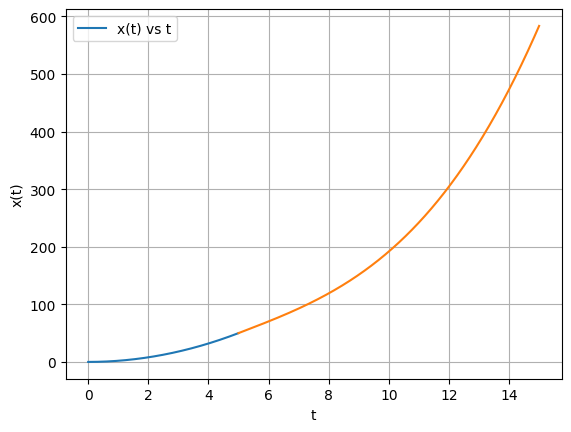

In [ ]:
# graffico de la distancia x que recorre el objeto en funcion del tiempo
t_1 = sp.symbols('t')
v1 = 4*t_1
v2 = 20 + (5-t_1)**2

x1 = sp.integrate(v1, (t_1, 0, t_1))
x1 = sp.lambdify(t_1, x1)

x2 = sp.integrate(v2, (t_1, 5, t_1))


x2 = sp.lambdify(t_1, x2)

t_lin1 = np.linspace(0,5, 2000)
t_lin2 = np.linspace(5,15, 2000)
x_lin = x1(t_lin1)
x_lin2 = x2(t_lin2)

plt.plot(t_lin1, x_lin, label = 'x(t) vs t')
plt.plot(t_lin2,x1(5) + x_lin2)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
v = lambda t: 4*t
v2 = lambda t: 20 + (5-t)**2
d1 = quad(v, 0, 5)[0]
d2 = quad(v2, 5, 15)[0]
F = 200

W1 = F*d1
W2 = F*d2
W = W1 + W2

print(f"El trabajo realizado por una fuerza constante a lo largo de la trayectoria es de {round(W,3)} J")

El trabajo realizado por una fuerza constante a lo largo de la trayectoria es de 116666.667 J


#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


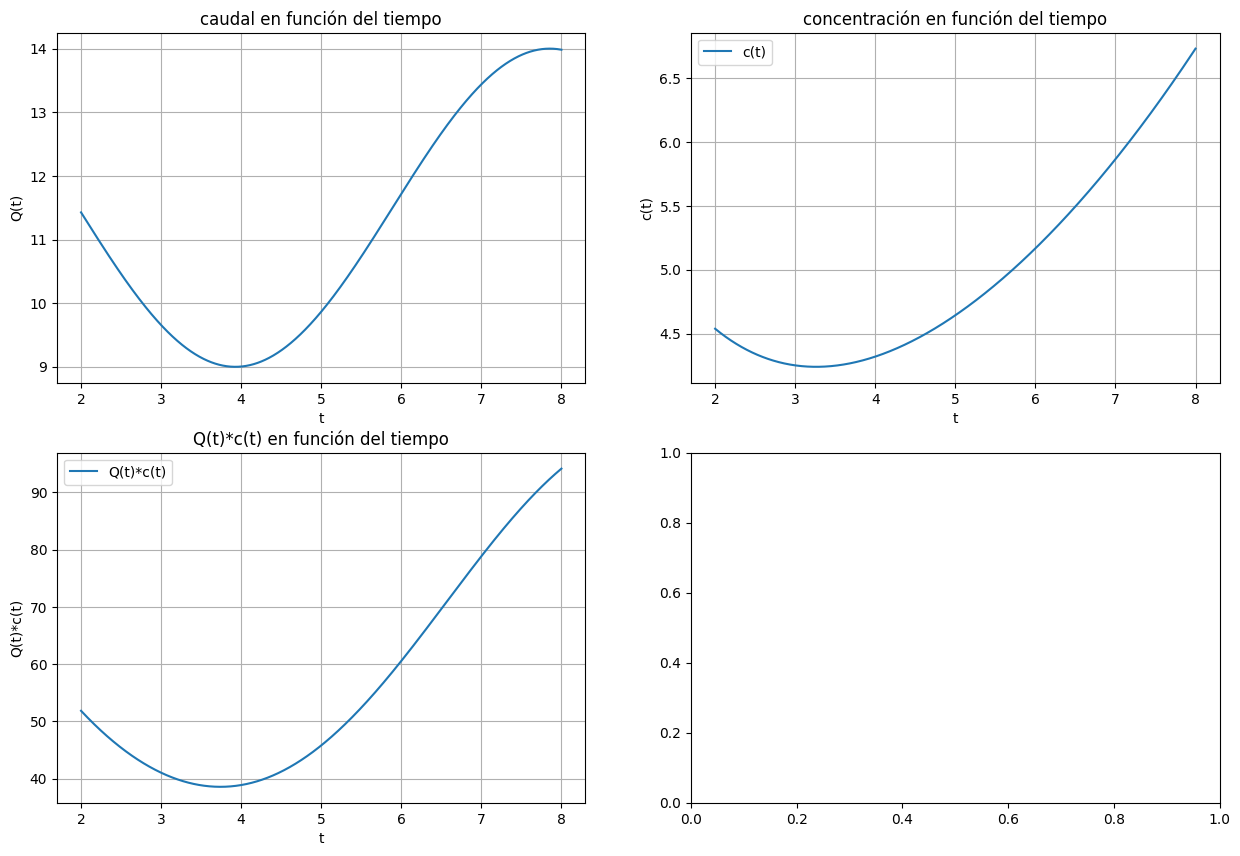

In [ ]:
t_lin = np.linspace(2, 8, 1000)
Q = lambda t: 9 + 5*((np.cos(0.4*t))**2)
c = lambda t: 5*np.exp(-0.5*t) + 2*np.exp(0.15*t)

Q_lin = Q(t_lin)
c_lin = c(t_lin)

fig, ax = plt.subplots(2, 2, figsize = (15, 10))
ax[0,0].plot(t_lin, Q_lin, label = 'Q(t)')
ax[0,0].title.set_text('caudal en función del tiempo')
ax[0,0].set_xlabel('t')
ax[0,0].set_ylabel('Q(t)')
ax[0,0].grid()

ax[0,1].plot(t_lin, c_lin, label = 'c(t)')
ax[0,1].title.set_text('concentración en función del tiempo')
ax[0,1].set_xlabel('t')
ax[0,1].set_ylabel('c(t)')
ax[0,1].grid()
ax[0,1].legend()

ax[1,0].plot(t_lin, Q_lin*c_lin, label = 'Q(t)*c(t)')
ax[1,0].title.set_text('Q(t)*c(t) en función del tiempo')
ax[1,0].set_xlabel('t')
ax[1,0].set_ylabel('Q(t)*c(t)')
ax[1,0].grid()
ax[1,0].legend()

plt.show()

* Determine el valor de la integral usando el método de integración de Romberg

In [ ]:
f = lambda t: Q(t)*c(t)
I = romberg(f, 2, 8)
print(f"El valor de la integral por el método de Romberg es: {I}")

El valor de la integral por el método de Romberg es: 335.9625300616253


* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.

In [ ]:
I_quad = quad(f, 2, 8)[0]
print(f"El valor de la integral por el método de cuadratura Gaussiana es: {I_quad}")
print(f"con un error entre ambos de: {abs(I_quad - I)}")

El valor de la integral por el método de cuadratura Gaussiana es: 335.9625300616257
con un error entre ambos de: 4.547473508864641e-13


#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [ ]:
# vamos a suponer que el pendulo fisico tiene una masa m y la barra de este pendulo una masa M_b que estaunikformemente distruibuida a lo largo del pendulo

# Parametros iniciales #

M_b = 0.2 # kg
m = 0.5 # kg
g = 9.80665  # m/s^2
l = 1 # m                         # longitud del pendulo
b = (M_b*(l/2) + m*l)/(M_b + m) # m                     # distancia b al centro de masa de el sistema
mt = M_b + m
I0 = (mt*l**2)/3 # kg*m^2
P0 = 2*np.pi*np.sqrt(I0/(mt*g*l))
thetha0 = np.pi/4
k = np.sin(thetha0/2)

# Calculo de el periodo

f = lambda phi: 1/((1 - ((k**2)*(np.sin(phi)**2)))**0.5)    # función a integrar.
I = quad(f, 0, np.pi/2)[0]      # solucion de la integral elíptica.
P = (2*P0*I)/np.pi          # Periodo.

print(f"El periodo de el pendulo físico tomando lo parametros iniciales es de: {round(P,2)} s^(-1)")


El periodo de el pendulo físico tomando lo parametros iniciales es de: 1.2 s^(-1)


In [ ]:
# solucion real #
import sympy as sp

phi = sp.symbols('phi')
f = 1/((1 - ((k**2)*(sp.sin(phi)**2)))**0.5)
I = sp.integrate(f, (phi, 0, np.pi/2))
In = I.evalf()
P = (2*P0*In)/np.pi
print(f"El periodo de el pendulo físico tomando lo parametros iniciales es de: {round(P,2)} s^(-1)")

El periodo de el pendulo físico tomando lo parametros iniciales es de: 1.20 s^(-1)


#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [ ]:
f = lambda t: (22.8)/(3.5 + 7*((t - 1.25)**4))

num = quad(f, 0, 2)[0]

n = 2
e = 0.5
for i in range(1, 100000):

  n_2 = n*2
  x_1 = np.linspace(0, 2, n)

  y_1 = f(x_1)

  I_1 = trapezoid(y_1, x_1)


  if abs(I_1 - num) < e:
    print(f"""La estima de número total de autos que cruzan el puente
entre las 4 y las 6 pm son de {round(I_1, 2)} autos, con un error de {round(abs(I_1 - num)/num * 100, 2)}%""")  # valor de la integral por el metodo simpson
    break

  else:
    n = n_2




La estima de número total de autos que cruzan el puente
entre las 4 y las 6 pm son de 9.57 autos, con un error de 4.25%


#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:


a) Aφ(r = 1.1, θ) vs. θ


b) Aφ(r, θ = π∕3) vs. r


In [ ]:
# datos dados #

a = 1
I = 3
k = 1

k_2 = lambda r,thetha: (4*a*r*np.sin(thetha))/(a**2 + r**2 + 2*a*r*np.sin(thetha))

#a)
errre = 1.1
thetha_lin = np.linspace(0.1,4*np.pi - 1e-2, 10000)


A = []
E = []
K = []
for i in thetha_lin:

  ks = k_2(errre, i)
  Eint = lambda phi: np.sqrt(1 - (ks)*(np.sin(phi)**2))
  Kint = lambda phi: 1/Eint(phi)
  Ei = quad(Eint, 0, np.pi/2)[0]
  Ki = quad(Kint, 0, np.pi/2)[0]
  E.append(Ei)
  K.append(Ki)
  Ai = k*((4*a*I)/(np.sqrt(a**2 + errre**2 + 2*a*errre*np.sin(i))))*(((2 - ks)*Ki - 2 * Ei )/ks)
  A.append(Ai)

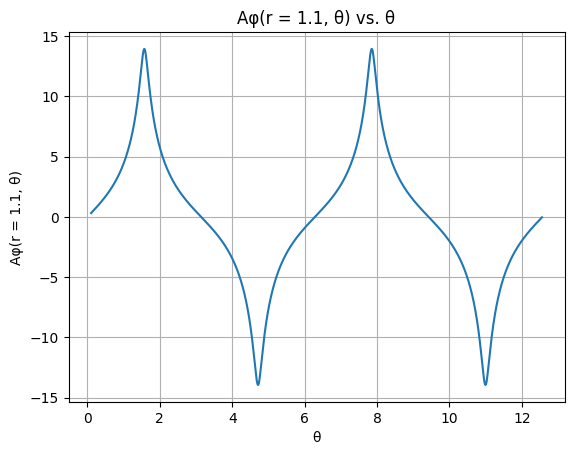

In [ ]:
plt.plot(thetha_lin, A)
plt.xlabel('θ')
plt.ylabel('Aφ(r = 1.1, θ)')
plt.title('Aφ(r = 1.1, θ) vs. θ')
plt.grid()
plt.show()

In [ ]:
#b)
thetha = np.pi/3
r_lin = np.linspace(0.1, 20, 1000)

A2 = []
for i in r_lin:

  ks = k_2(i, thetha)
  Eint2 = lambda phi: np.sqrt(1 - (ks)*(np.sin(phi)**2))
  Kint3 = lambda phi: 1/Eint2(phi)
  Ei2 = quad(Eint2, 0, np.pi/2)[0]
  Ki3 = quad(Kint3, 0, np.pi/2)[0]
  Ai2 = ((4*a*I)/(np.sqrt(a**2 + i**2 + 2*a*i*np.sin(thetha))))*(((2 - ks)*Ki3 - 2 * Ei2 )/ks)
  A2.append(Ai2)





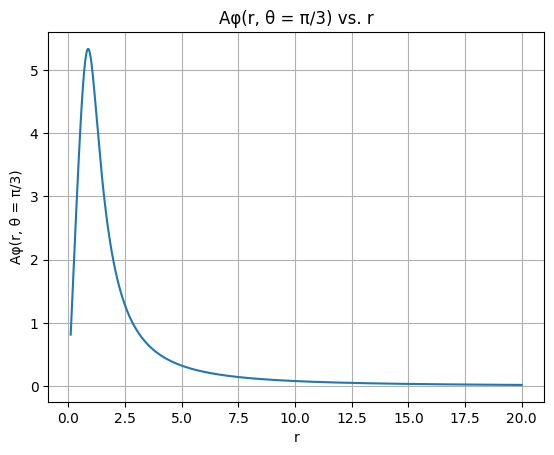

In [ ]:
plt.plot(r_lin, A2)
plt.xlabel('r')
plt.ylabel('Aφ(r, θ = π∕3)')
plt.title('Aφ(r, θ = π∕3) vs. r')
plt.grid()